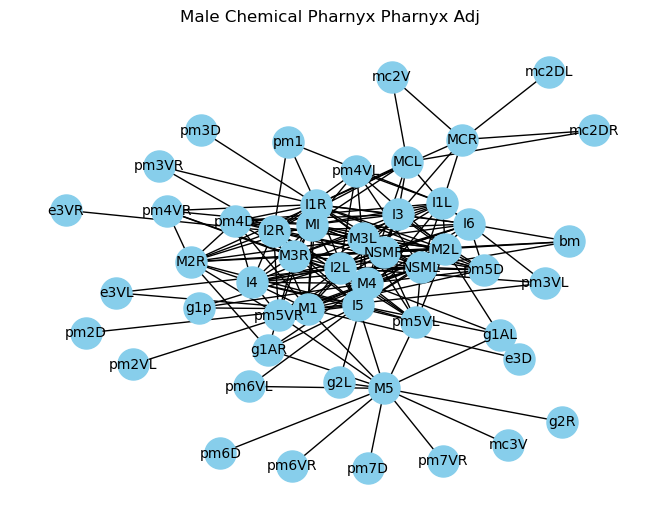

In [28]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the adjacency matrix from the XLSX file
file_path = r'D:\Complex Systems Project\Data Sets\Filtered Data\Male chemical pharnyx_pharnyx adj.xlsx'  # Replace with your file path
df = pd.read_excel(file_path, engine='openpyxl', header=0, index_col=0)

# Create a graph from the adjacency matrix
G = nx.Graph()
for source in df.index:
    for target in df.columns:
        if df.loc[source, target] == 1:
            G.add_edge(source, target)

# Draw the network graph with node labels
pos = nx.kamada_kawai_layout(G)  # You can use other layout algorithms as well
node_labels = {node: node for node in G.nodes()}
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, font_size=10)
plt.title('Male Chemical Pharnyx Pharnyx Adj')
plt.show()

In [30]:
#Degree of each node in the given network

degrees = dict(G.degree())

# Print the degrees of each node
for node, degree in degrees.items():
    print(f"Node {node}: Degree {degree}")

Node I1L: Degree 15
Node I2L: Degree 16
Node I3: Degree 15
Node I5: Degree 21
Node I6: Degree 12
Node M2L: Degree 14
Node M3L: Degree 15
Node M3R: Degree 17
Node MCL: Degree 8
Node MCR: Degree 6
Node MI: Degree 17
Node NSML: Degree 18
Node pm1: Degree 3
Node pm3VL: Degree 3
Node pm4D: Degree 12
Node pm4VL: Degree 7
Node I1R: Degree 21
Node I2R: Degree 19
Node M1: Degree 18
Node M2R: Degree 12
Node NSMR: Degree 16
Node pm3D: Degree 1
Node pm3VR: Degree 2
Node pm4VR: Degree 5
Node pm5D: Degree 11
Node pm5VR: Degree 10
Node I4: Degree 15
Node M4: Degree 22
Node pm5VL: Degree 10
Node e3VL: Degree 2
Node e3VR: Degree 1
Node M5: Degree 14
Node pm6VL: Degree 2
Node g1AL: Degree 4
Node g1AR: Degree 5
Node g1p: Degree 3
Node bm: Degree 4
Node pm2D: Degree 1
Node pm2VL: Degree 1
Node e3D: Degree 1
Node g2L: Degree 2
Node pm6D: Degree 1
Node pm6VR: Degree 1
Node pm7D: Degree 1
Node pm7VR: Degree 1
Node mc3V: Degree 1
Node g2R: Degree 1
Node mc2DR: Degree 2
Node mc2V: Degree 2
Node mc2DL: Degree 1

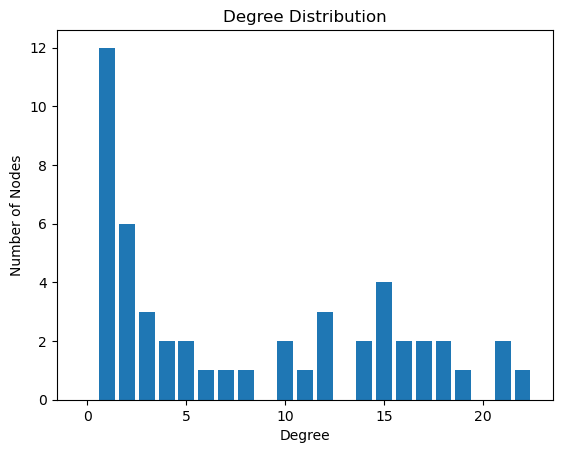

In [31]:
#Plot Degree distribution graph
degrees = [d for n, d in G.degree()]

# Create a histogram of the degree distribution
degree_histogram = nx.degree_histogram(G)

# Plot the degree distribution
plt.bar(range(len(degree_histogram)), degree_histogram)
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('Degree Distribution')
plt.show()

In [12]:
#Average degree of the network
avg_degree = sum(dict(G.degree()).values()) / len(G)
print(avg_degree)

8.24


In [14]:
#Clustering coefficient and shortest path length

# Calculate clustering coefficient
clustering_coefficient = nx.average_clustering(G)

# Calculate the average shortest path length
shortest_path_length = nx.average_shortest_path_length(G)

print(f"Clustering Coefficient: {clustering_coefficient}")
print(f"Average Shortest Path Length: {shortest_path_length}")


Clustering Coefficient: 0.38847157177188146
Average Shortest Path Length: 2.3289795918367346


In [15]:
#Shortest path length for each node
shortest_path_lengths = {}

for node in G.nodes():
    lengths = nx.single_source_shortest_path_length(G, node)
    shortest_path_lengths[node] = lengths

# Print the results
for node, lengths in shortest_path_lengths.items():
    print(f"Shortest path lengths from node {node}:")
    for target, length in lengths.items():
        print(f"To node {target}: Length {length}")

Shortest path lengths from node I1L:
To node I1L: Length 0
To node I2L: Length 1
To node I3: Length 1
To node I5: Length 1
To node I6: Length 1
To node M2L: Length 1
To node M3L: Length 1
To node M3R: Length 1
To node MCL: Length 1
To node MCR: Length 1
To node MI: Length 1
To node NSML: Length 1
To node pm1: Length 1
To node pm3VL: Length 1
To node pm4D: Length 1
To node pm4VL: Length 1
To node I2R: Length 2
To node I4: Length 2
To node M1: Length 2
To node M4: Length 2
To node NSMR: Length 2
To node pm5D: Length 2
To node pm5VL: Length 2
To node pm5VR: Length 2
To node e3VL: Length 2
To node I1R: Length 2
To node M5: Length 2
To node pm6VL: Length 2
To node g1AL: Length 2
To node g1AR: Length 2
To node M2R: Length 2
To node g1p: Length 2
To node bm: Length 2
To node pm4VR: Length 2
To node mc2DR: Length 2
To node mc2V: Length 2
To node mc2DL: Length 2
To node pm3VR: Length 3
To node e3VR: Length 3
To node pm2D: Length 3
To node pm2VL: Length 3
To node e3D: Length 3
To node g2L: Lengt

In [25]:
#Choosing two nodes and finding their shortest path
source_node = input("Enter the source node: ")
target_node = input("Enter the target node: ")

# Check if the input nodes are in the graph
if source_node in G.nodes() and target_node in G.nodes():
    # Calculate the shortest path
    shortest_path = nx.shortest_path(G, source=source_node, target=target_node)
    
    # Print the shortest path
    print(f"Shortest path from {source_node} to {target_node}:")
    print(shortest_path)
else:
    print("One or both of the input nodes are not in the graph.")

Enter the source node: I5
Enter the target node: mc2V
Shortest path from I5 to mc2V:
['I5', 'I1L', 'MCL', 'mc2V']
